source: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

insurance_data = pd.read_csv('insurance.csv')
insurance_data.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


D:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


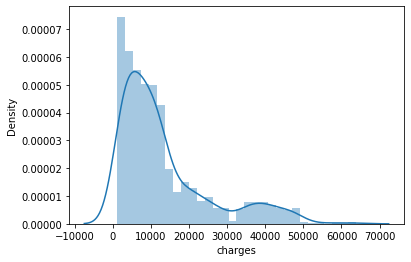

In [20]:
sns.distplot(insurance_data.charges)

Given the warning, I figured I would try both displot() and histplot()

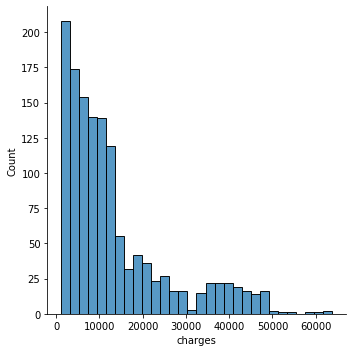

In [21]:
sns.displot(insurance_data.charges)

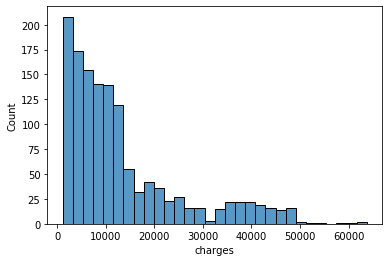

In [22]:
sns.histplot(insurance_data.charges)

Interestingly enough, the plots themselves are the same, but presented differently, as the histplot() function puts a box around the plot.

D:\Python\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


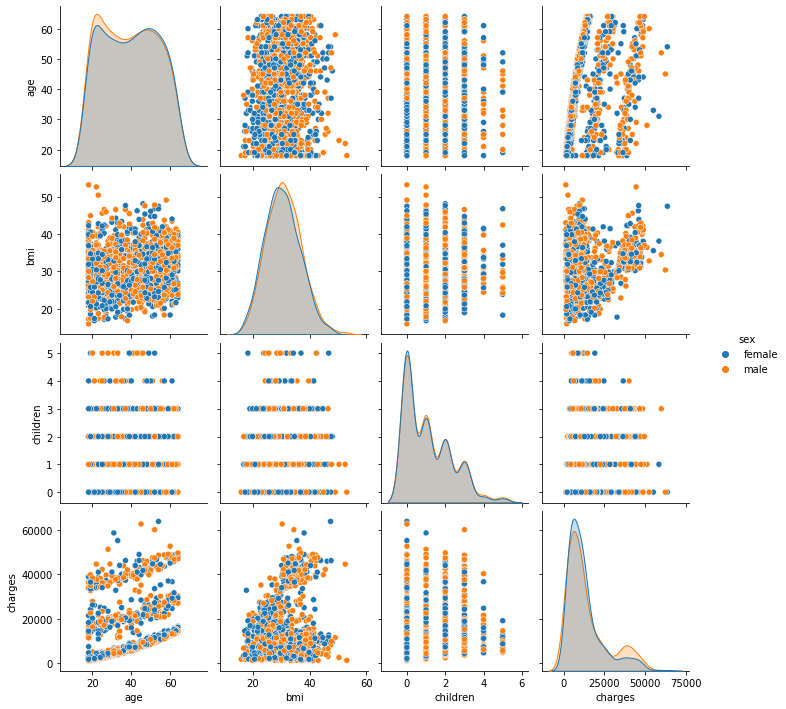

In [23]:
sns.pairplot(insurance_data, hue='sex', size=2.5)

Seems as though many of the terms for seaborn from the textbook are outdated.

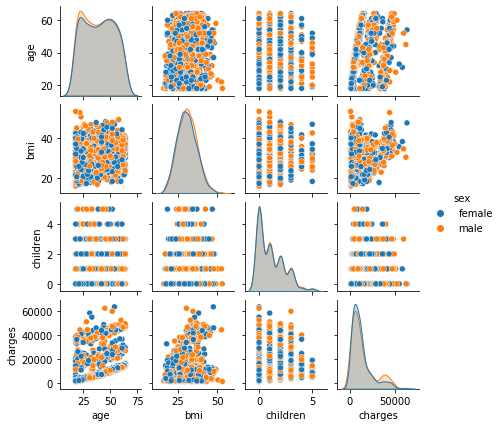

In [26]:
sns.pairplot(insurance_data, hue='sex', height=1.5)

With this pairplot we can see lots of information. For example, we can see the charges density distribution we plotted before in the bottom right corner. We can also see the difference between the discrete and continuous data visually, such as the variable children having straight lines in their plots, showing that it is a discrete variable.

We can see a clear (and expected) positive relationship between charges and age in the bottom left plot where, in other words, as an individual ages, the more likely their medical costs will go up. 

I didn't find that by having the hue = 'sex' there were distinct insights from the data, though I'm sure there are many if looking at the descriptive statistics. But I think we might see some patterns when change hue = 'smoker'.

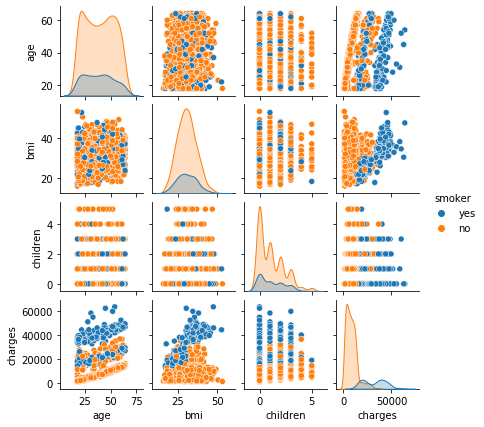

In [27]:
sns.pairplot(insurance_data, hue='smoker', height=1.5)

Sure enough, we find more distinct clusters between smokers and non-smokers.

I am interested in seeing the male and female boxplots in relation to their charges across age.

D:\Python\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


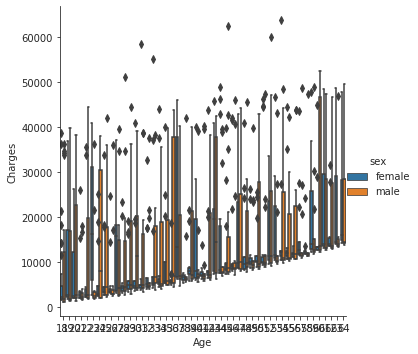

In [32]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("age", "charges", "sex", data=insurance_data, kind="box")
    g.set_axis_labels("Age", "Charges");

Lots of outliers...I had a feeling it wouldn't create intervals for the ages, and something would be amiss with the plot, but what we got is really something else. Let's try to fix this!

I'll first see the min and max ages...

In [30]:
print(min(insurance_data.age), max(insurance_data.age))

18 64


It has a much smaller range than I expected.

Let's also try to remove those warnings by providing the proper notation.

In [74]:
insurance_age_intervals = insurance_data.copy()
for i in range(18, 65):
    if i < 20:
        age_dictionary = {**age_dictionary, **{i : "10s"}}
    if 20 <= i < 30:
        age_dictionary = {**age_dictionary, **{i : "20s"}}
    if 30 <= i < 40:
        age_dictionary = {**age_dictionary, **{i : "30s"}}
    if 40 <= i < 50:
        age_dictionary = {**age_dictionary, **{i : "40s"}}
    if 50 <= i < 60:
        age_dictionary = {**age_dictionary, **{i : "50s"}}
    if 60 <= i:
        age_dictionary = {**age_dictionary, **{i : "60s"}}

def set_value(row_number, assigned_value):
    return assigned_value[row_number]  

insurance_age_intervals['age_interval'] = insurance_age_intervals['age'].apply(set_value, args =(age_dictionary, ))

print(insurance_age_intervals)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

     age_interval  
0             10s  
1             10s  
2             20s  
3             30s  
4             30s  
...           ...  
1333          50s  

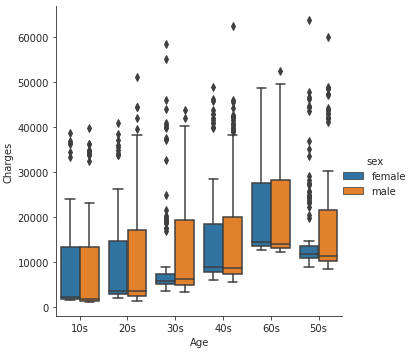

In [76]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "age_interval", y = "charges", hue = "sex", data=insurance_age_intervals, kind="box")
    g.set_axis_labels("Age", "Charges")

Impressed myself with how well that method worked. Though it's strange that 60s comes before 50s on the x-axis. See if I can fix that.

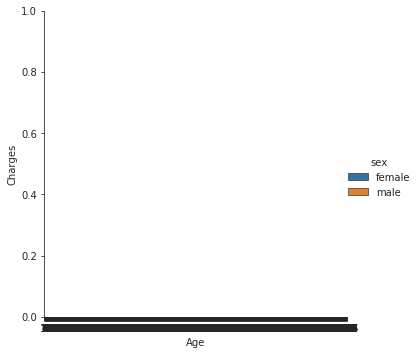

In [80]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "age_interval", y = "charges", hue = "sex", data=insurance_age_intervals, kind="box", order=insurance_age_intervals['age_interval'].index)
    g.set_axis_labels("Age", "Charges")

That definitely didn't work

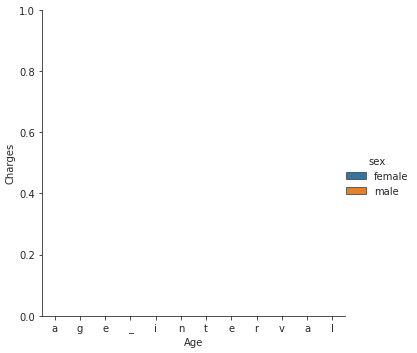

In [86]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "age_interval", y = "charges", hue = "sex", data=insurance_age_intervals, kind="box", order='age_interval')
    g.set_axis_labels("Age", "Charges")

That's a funny bug.

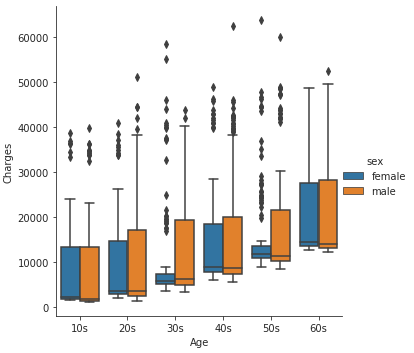

In [87]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "age_interval", y = "charges", hue = "sex", data=insurance_age_intervals, kind="box", order=("10s", "20s", "30s", "40s", "50s", "60s"))
    g.set_axis_labels("Age", "Charges")

Tada! We can see the median health insurance charges increase with age, as well as males tending to have higher variability in their charges.

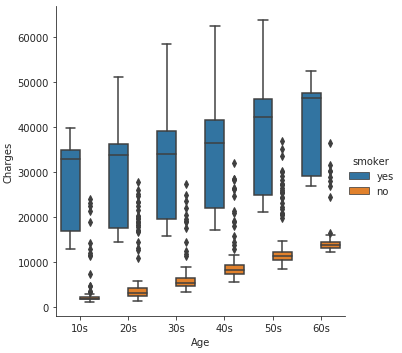

In [88]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "age_interval", y = "charges", hue = "smoker", data=insurance_age_intervals, kind="box", order=("10s", "20s", "30s", "40s", "50s", "60s"))
    g.set_axis_labels("Age", "Charges")

As we had seen before, smokers have a higher median of health insurance charges, but while also having higher variability in charges.

In my search for a solution to my previous dilemma, I found an interesting plot, the stripplot, I want to try out. I figured I should try it without the new intervals developed for ages, as I'm sure it will show a linear positive relationship between age and charges we had seen earlier in our pairplot.

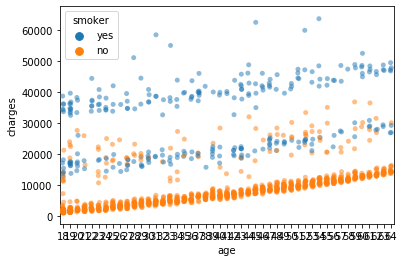

In [43]:
sns.stripplot(x='age', y='charges', hue='smoker', data=insurance_data, jitter=True, marker='o', alpha=0.5)

Sure enough it does! We can also see that across all ages smokers have higher health insurance charges than non-smokers, which is both something  expected and what we saw in the pairplot before (though was left unmentioned). Now let's try with the created age intervals.

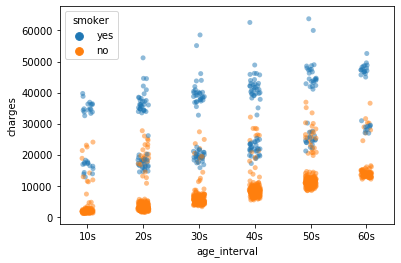

In [92]:
sns.stripplot(x='age_interval', y='charges', hue='smoker', data=insurance_age_intervals, jitter=True, marker='o', alpha=0.5, order=("10s", "20s", "30s", "40s", "50s", "60s"))

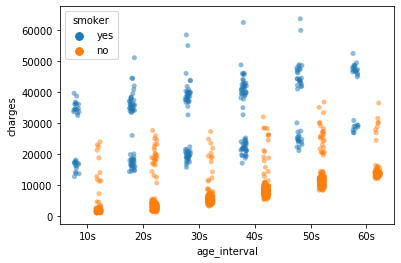

In [93]:
sns.stripplot(x='age_interval', y='charges', hue='smoker', dodge = True, data=insurance_age_intervals, jitter=True, marker='o', alpha=0.5, order=("10s", "20s", "30s", "40s", "50s", "60s"))

Very neat. Let's see the regional differences!

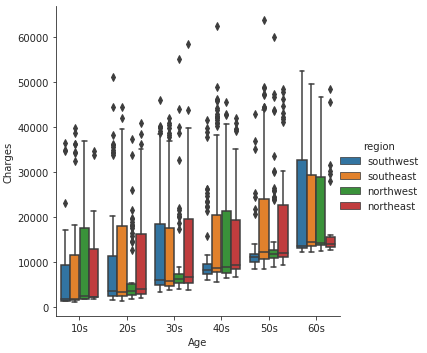

In [101]:
with sns.axes_style(style='ticks'):
    g = sns.catplot(x = "age_interval", y = "charges", hue = "region", data=insurance_age_intervals, kind="box", order=("10s", "20s", "30s", "40s", "50s", "60s"))
    g.set_axis_labels("Age", "Charges")

Let's move on to another dataset

source = https://www.kaggle.com/datasets/donjoeml/energy-consumption-and-generation-in-the-globe

In [222]:
energy_consumption_df = pd.read_csv('energy_consumption.csv')
energy_consumption_df.head(-1)

,Entity,Code,Year,Oil (% sub energy),Coal (% sub energy),Solar (% sub energy),Nuclear (% sub energy),Hydro (% sub energy),Wind (% sub energy),Gas (% sub energy),Other renewables (% sub energy)
0,Africa,NaN,1965,46.720,46.375,0.000,0.000,5.537,0.000,1.368,0.000
1,Africa,NaN,1966,48.626,44.047,0.000,0.000,5.873,0.000,1.454,0.000
2,Africa,NaN,1967,47.838,44.655,0.000,0.000,6.080,0.000,1.426,0.000
3,Africa,NaN,1968,47.859,44.029,0.000,0.000,6.743,0.000,1.370,0.000
4,Africa,NaN,1969,47.373,43.381,0.000,0.000,7.683,0.000,1.563,0.000
...,...,...,...,...,...,...,...,...,...,...,...
4278,World,OWID_WRL,2014,33.389,30.011,0.336,4.317,6.616,1.200,22.694,0.851
4279,World,OWID_WRL,2015,33.730,29.059,0.431,4.319,6.513,1.394,23.051,0.903
4280,World,OWID_WRL,2016,33.947,28.243,0.540,4.300,6.598,1.585,23.270,0.901
4281,World,OWID_WRL,2017,33.768,27.853,0.718,4.237,6.530,1.832,23.502,0.936


This data seems to look at the World as a whole, continents, and countries. First I'm interested to see the the types of energy consumption of the world as a whole. But first I'm going to change the names of the columns, so they are easier to work with.

In [223]:
energy_consumption_df = energy_consumption_df.rename(columns={'Oil (% sub energy)':'Oil %',
                                                              'Coal (% sub energy)':'Coal %',
                                                              'Solar (% sub energy)':'Solar %',
                                                              'Nuclear (% sub energy)':'Nuclear %', 
                                                              'Hydro (% sub energy)':'Hydro %', 
                                                              'Wind (% sub energy)':'Wind %', 
                                                              'Gas (% sub energy)':'Gas %', 
                                                              'Other renewables (% sub energy)':'Other Renewables %',})
energy_consumption_df.head()

,Entity,Code,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
0,Africa,NaN,1965,46.720,46.375,0.0,0.0,5.537,0.0,1.368,0.0
1,Africa,NaN,1966,48.626,44.047,0.0,0.0,5.873,0.0,1.454,0.0
2,Africa,NaN,1967,47.838,44.655,0.0,0.0,6.080,0.0,1.426,0.0
3,Africa,NaN,1968,47.859,44.029,0.0,0.0,6.743,0.0,1.370,0.0
4,Africa,NaN,1969,47.373,43.381,0.0,0.0,7.683,0.0,1.563,0.0


In [224]:
world_energy_consumption = energy_consumption_df[energy_consumption_df['Entity'] == 'World']
world_energy_consumption.head()

,Entity,Code,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
4229,World,OWID_WRL,1965,41.872,37.321,0.0,0.164,5.930,0.0,14.576,0.116
4230,World,OWID_WRL,1966,42.772,35.812,0.0,0.210,5.995,0.0,15.069,0.121
4231,World,OWID_WRL,1967,44.168,33.956,0.0,0.241,5.907,0.0,15.590,0.117
4232,World,OWID_WRL,1968,45.188,32.486,0.0,0.288,5.864,0.0,16.031,0.122
4233,World,OWID_WRL,1969,45.877,31.358,0.0,0.320,5.816,0.0,16.489,0.121


Let's get rid of the Code column as it won't serve any purpose to our plot.

In [225]:
world_energy_consumption = world_energy_consumption.drop(world_energy_consumption.columns[1],axis=1)
world_energy_consumption.head()

,Entity,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
4229,World,1965,41.872,37.321,0.0,0.164,5.930,0.0,14.576,0.116
4230,World,1966,42.772,35.812,0.0,0.210,5.995,0.0,15.069,0.121
4231,World,1967,44.168,33.956,0.0,0.241,5.907,0.0,15.590,0.117
4232,World,1968,45.188,32.486,0.0,0.288,5.864,0.0,16.031,0.122
4233,World,1969,45.877,31.358,0.0,0.320,5.816,0.0,16.489,0.121


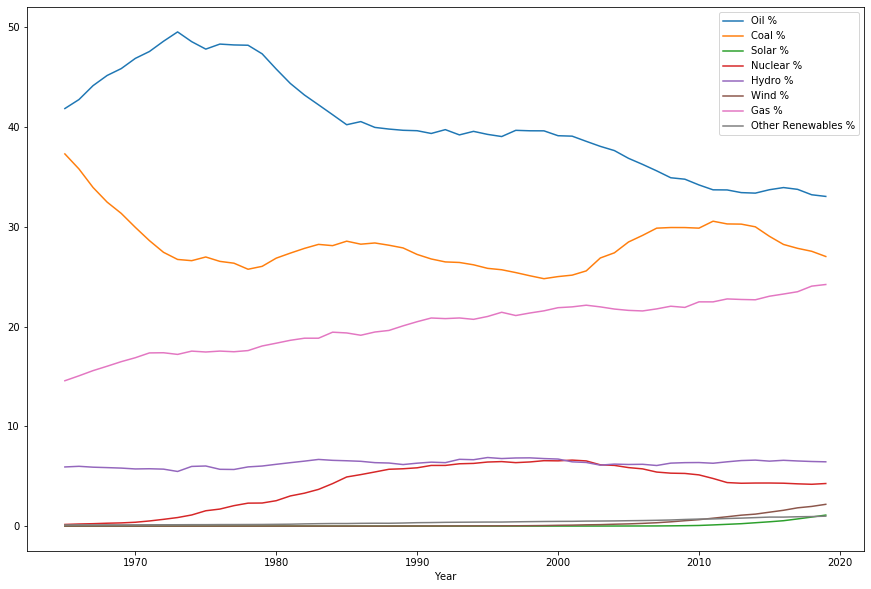

In [229]:
world_energy_consumption.plot(x="Year", y=['Oil %', 'Coal %', 'Solar %', 'Nuclear %', 'Hydro %', 'Wind %', 'Gas %', 'Other Renewables %'], kind='line', figsize = (15,10))

We can see over time oil has had a declining share in world energy consumption, while Gas has had a steady increase. We can also see with the onset of the 2010s an upward trend in Solar, Wind, and Other Renewables. Hydro has had a pretty consistent share across time.

Let's check out Canada in particular.

In [230]:
canada_energy_consumption = energy_consumption_df[energy_consumption_df['Entity'] == 'Canada']
canada_energy_consumption.head()

,Entity,Code,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
559,Canada,CAN,1965,46.994,13.158,0.0,0.026,23.981,0.0,15.841,0.0
560,Canada,CAN,1966,46.538,12.125,0.0,0.033,25.004,0.0,16.301,0.0
561,Canada,CAN,1967,47.501,11.484,0.0,0.028,24.438,0.0,16.549,0.0
562,Canada,CAN,1968,47.485,11.716,0.0,0.157,23.338,0.0,17.304,0.0
563,Canada,CAN,1969,46.647,10.671,0.0,0.086,24.352,0.0,18.244,0.0


In [231]:
canada_energy_consumption = canada_energy_consumption.drop(canada_energy_consumption.columns[1],axis=1)
canada_energy_consumption.head()

,Entity,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
559,Canada,1965,46.994,13.158,0.0,0.026,23.981,0.0,15.841,0.0
560,Canada,1966,46.538,12.125,0.0,0.033,25.004,0.0,16.301,0.0
561,Canada,1967,47.501,11.484,0.0,0.028,24.438,0.0,16.549,0.0
562,Canada,1968,47.485,11.716,0.0,0.157,23.338,0.0,17.304,0.0
563,Canada,1969,46.647,10.671,0.0,0.086,24.352,0.0,18.244,0.0


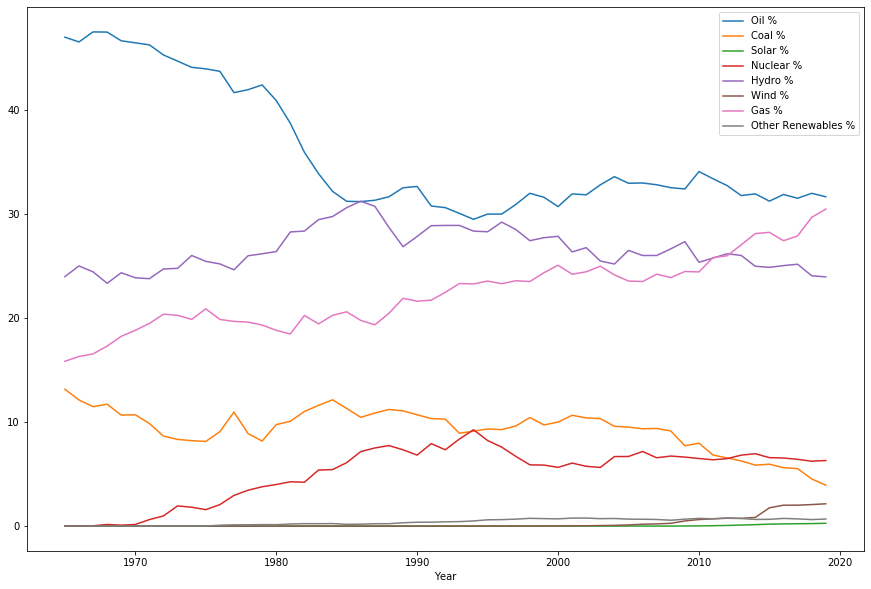

In [232]:
canada_energy_consumption.plot(x="Year", y=['Oil %', 'Coal %', 'Solar %', 'Nuclear %', 'Hydro %', 'Wind %', 'Gas %', 'Other Renewables %'], kind='line', figsize = (15,10))

This provides us with a lot of interesting information especially when we compare it to what we found in the world data. We still see a decline in the share of oil in consumption, and an increase in gas, however in the case of Canada we find that gas is on track to surpass oil in share of energy consumption. We also find that Canada, has a substantially greater share of energy consumption by means of hydro than the world average. Canada also has a substatially smaller share of consumption in coal with Nuclear having a greater share (nuclear power being a great point of interest of mine, and I'm happy to say we'll be seeing a lot more of it, as we already have just recently).

Let's check out how Canada compares to the United States in some of these energy sources.

In [251]:
usa_energy_consumption = energy_consumption_df[energy_consumption_df['Entity'] == 'United States']
usa_energy_consumption.head()

,Entity,Code,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
4029,United States,USA,1965,45.184,22.137,0.0,0.073,3.795,0.0,28.556,0.254
4030,United States,USA,1966,44.916,21.976,0.0,0.105,3.610,0.0,29.139,0.254
4031,United States,USA,1967,45.083,20.835,0.0,0.141,3.965,0.0,29.731,0.246
4032,United States,USA,1968,45.446,20.328,0.0,0.217,3.753,0.0,30.001,0.256
4033,United States,USA,1969,45.489,19.376,0.0,0.229,3.997,0.0,30.656,0.253


In [252]:
usa_energy_consumption = usa_energy_consumption.drop(usa_energy_consumption.columns[1],axis=1)
usa_energy_consumption.head()

,Entity,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
4029,United States,1965,45.184,22.137,0.0,0.073,3.795,0.0,28.556,0.254
4030,United States,1966,44.916,21.976,0.0,0.105,3.610,0.0,29.139,0.254
4031,United States,1967,45.083,20.835,0.0,0.141,3.965,0.0,29.731,0.246
4032,United States,1968,45.446,20.328,0.0,0.217,3.753,0.0,30.001,0.256
4033,United States,1969,45.489,19.376,0.0,0.229,3.997,0.0,30.656,0.253


In [255]:
can_vs_usa_energy = pd.concat([usa_energy_consumption, canada_energy_consumption])
can_vs_usa_energy.head(-1)

,Entity,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
4029,United States,1965,45.184,22.137,0.000,0.073,3.795,0.000,28.556,0.254
4030,United States,1966,44.916,21.976,0.000,0.105,3.610,0.000,29.139,0.254
4031,United States,1967,45.083,20.835,0.000,0.141,3.965,0.000,29.731,0.246
4032,United States,1968,45.446,20.328,0.000,0.217,3.753,0.000,30.001,0.256
4033,United States,1969,45.489,19.376,0.000,0.229,3.997,0.000,30.656,0.253
...,...,...,...,...,...,...,...,...,...,...
608,Canada,2014,31.935,5.857,0.138,6.956,24.974,0.837,28.117,0.640
609,Canada,2015,31.234,5.950,0.188,6.580,24.873,1.755,28.235,0.650
610,Canada,2016,31.874,5.612,0.213,6.543,25.038,2.009,27.429,0.738
611,Canada,2017,31.510,5.524,0.228,6.417,25.170,2.010,27.893,0.692


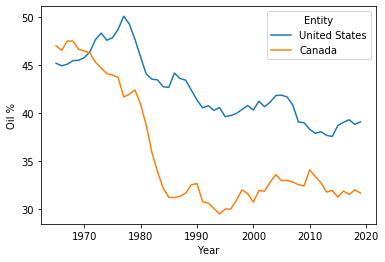

In [266]:
sns.lineplot(x="Year", y='Oil %', hue = 'Entity', data = can_vs_usa_energy)

Seems like the USA is more dependent on oil as an energy source since the 70s. I am interested in seeing information for nuclear power as well.

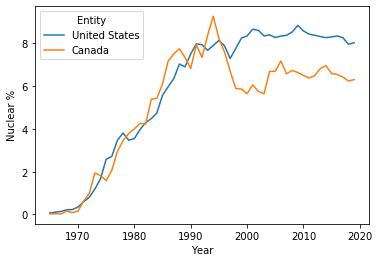

In [267]:
sns.lineplot(x="Year", y='Nuclear %', hue = 'Entity', data = can_vs_usa_energy)

Seems as though the portion of nuclear power followed a similar upward trend from the 60s to the 90s, until Canada had a steep drop off in nuclear consumption. This has since stabilized a divide between Canada and the United States with the U.S. retaining a higher share of energy consumption in nuclear. 

Let's see the countries that have the highest/lowest share of some of these energy sources.

In [269]:
energy_consumption_df.sort_values(by='Oil %', ascending = False)

,Entity,Code,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
816,Cyprus,CYP,1972,100.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0
2637,Oman,OMN,1973,100.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0
827,Cyprus,CYP,1983,100.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0
826,Cyprus,CYP,1982,100.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0
825,Cyprus,CYP,1981,100.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4114,Uzbekistan,UZB,2015,5.742,3.088,0.000,0.0,2.901,0.0,88.269,0.0
4115,Uzbekistan,UZB,2016,5.637,3.066,0.000,0.0,3.724,0.0,87.573,0.0
4116,Uzbekistan,UZB,2017,5.385,3.601,0.000,0.0,4.242,0.0,86.772,0.0
4117,Uzbekistan,UZB,2018,5.092,4.650,0.001,0.0,2.885,0.0,87.371,0.0


In [270]:
energy_consumption_df.sort_values(by='Nuclear %', ascending = False)

,Entity,Code,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
2142,Lithuania,LTU,2003,28.322,2.006,0.000,41.707,0.876,0.000,27.071,0.019
1278,France,FRA,2014,32.285,3.663,0.549,40.512,5.832,1.601,13.825,0.540
1275,France,FRA,2011,33.747,3.994,0.189,40.308,4.081,1.098,15.125,0.499
2141,Lithuania,LTU,2002,31.003,1.629,0.000,40.191,1.004,0.000,26.162,0.011
1279,France,FRA,2015,32.131,3.537,0.666,40.145,4.997,1.950,14.784,0.592
...,...,...,...,...,...,...,...,...,...,...,...
2103,Latvia,LVA,1999,48.392,3.895,0.000,0.000,20.101,0.015,27.598,0.000
2104,Latvia,LVA,2000,40.644,4.109,0.000,0.000,21.023,0.037,34.187,0.000
2105,Latvia,LVA,2001,43.971,3.556,0.000,0.000,19.466,0.021,32.966,0.021
2106,Latvia,LVA,2002,43.206,2.837,0.000,0.000,16.646,0.074,37.169,0.068


I knew France was a big player in Nuclear energy, but didn't realize it made up for 40% of their energy consumption.

In [275]:
energy_consumption_df.sort_values(by='Hydro %', ascending = False)

,Entity,Code,Year,Oil %,Coal %,Solar %,Nuclear %,Hydro %,Wind %,Gas %,Other Renewables %
2599,Norway,NOR,1990,22.115,1.993,0.000,0.0,71.055,0.000,4.712,0.125
2609,Norway,NOR,2000,19.157,2.080,0.003,0.0,70.982,0.015,7.634,0.128
2592,Norway,NOR,1983,23.643,2.802,0.000,0.0,70.602,0.000,2.953,0.000
2601,Norway,NOR,1992,21.702,1.834,0.000,0.0,70.444,0.000,5.882,0.137
2598,Norway,NOR,1989,23.208,2.149,0.000,0.0,70.132,0.000,4.494,0.017
...,...,...,...,...,...,...,...,...,...,...,...
1518,Iceland,ISL,1979,47.894,1.173,0.000,0.0,50.122,0.000,0.000,0.811
1516,Iceland,ISL,1977,50.930,0.017,0.000,0.0,48.740,0.000,0.000,0.312
1517,Iceland,ISL,1978,51.392,0.014,0.000,0.0,48.255,0.000,0.000,0.339
1515,Iceland,ISL,1976,51.514,0.020,0.000,0.0,48.076,0.000,0.000,0.389


Wow! Norway with 70% of their energy consumption from Hydro.